In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2012/results.csv", header=0, error_bad_lines=False)
    

In [3]:


for col in df.columns: 
    print(col)

division
name
city
gender
age
official
bib
overall
state
genderdiv
net
country


In [4]:
df.head()

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
0,4 / 26,"Soejima, Masazumi",Fukuoka City,M,41,83.45,W1,4 / 35,NaN,4 / 26,83.45,JPN
1,14 / 4335,"Gebremariam, Gebregziabher",Tigray,M,27,142.93,2,14 / 21616,NaN,14 / 12621,142.93,ETH
2,6 / 26,"Van Dyk, Ernst F.",Paarl,M,39,84.38,W2,6 / 35,NaN,6 / 26,84.38,RSA
3,2 / 26,"Fearnley, Kurt H.",Hamilton,M,31,81.65,W3,2 / 35,NaN,2 / 26,81.65,AUS
4,3 / 26,"Hokinoue, Kota",Iizuka,M,38,83.43,W4,3 / 35,NaN,3 / 26,83.43,JPN


In [5]:
#get dummies

df_gender = pd.get_dummies(df[['gender']])



df_new = pd.concat([df, df_gender], axis=1)
df_new

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country,gender_F,gender_M
0,4 / 26,"Soejima, Masazumi",Fukuoka City,M,41,83.45,W1,4 / 35,NaN,4 / 26,83.45,JPN,0,1
1,14 / 4335,"Gebremariam, Gebregziabher",Tigray,M,27,142.93,2,14 / 21616,NaN,14 / 12621,142.93,ETH,0,1
2,6 / 26,"Van Dyk, Ernst F.",Paarl,M,39,84.38,W2,6 / 35,NaN,6 / 26,84.38,RSA,0,1
3,2 / 26,"Fearnley, Kurt H.",Hamilton,M,31,81.65,W3,2 / 35,NaN,2 / 26,81.65,AUS,0,1
4,3 / 26,"Hokinoue, Kota",Iizuka,M,38,83.43,W4,3 / 35,NaN,3 / 26,83.43,JPN,0,1
5,2 / 4335,"Matebo, Levy",Trans Nzoia,M,22,133.10,4,2 / 21616,NaN,2 / 12621,133.10,KEN,0,1
6,1 / 4599,"Cherop, Sharon",Marakwet,F,28,151.83,F4,28 / 21616,NaN,1 / 8995,151.83,KEN,1,0
7,5 / 4335,"Chebet, Wilson",Marakwet,M,26,134.93,5,5 / 21616,NaN,5 / 12621,134.93,KEN,0,1
8,1 / 26,"Cassidy, Joshua R.",Toronto,M,27,78.42,W5,1 / 35,ON,1 / 26,78.42,CAN,0,1
9,5 / 26,"Schabort, Krige",Cedartown,M,48,83.73,W6,5 / 35,GA,5 / 26,83.73,USA,0,1


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_new['country'])


LabelEncoder()

In [7]:
le.classes_


array(['ARG', 'AUS', 'AUT', 'BAH', 'BEL', 'BER', 'BRA', 'CAN', 'CAY',
       'CHI', 'CHN', 'COL', 'CRC', 'CRO', 'CZE', 'DEN', 'DOM', 'ECU',
       'ESP', 'EST', 'ETH', 'FIN', 'FRA', 'GBR', 'GER', 'GRE', 'GUA',
       'HKG', 'HUN', 'IND', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KEN',
       'KOR', 'LUX', 'MAS', 'MEX', 'MLT', 'NED', 'NGR', 'NOR', 'NZL',
       'PER', 'PHI', 'POL', 'POR', 'RSA', 'RUS', 'SIN', 'SLO', 'SUI',
       'SVK', 'SWE', 'UAE', 'URU', 'USA', 'VEN'], dtype=object)

In [8]:
df_new["country_encoded"] = le.transform(df_new.country)


In [9]:
X = df_new[["age","net", "gender_M", "country_encoded"]]



In [10]:

# Normalize the data.
X_norm = normalize(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=6, random_state=42).fit_predict(X)











### Some general visualizations of the variables I am looking at 

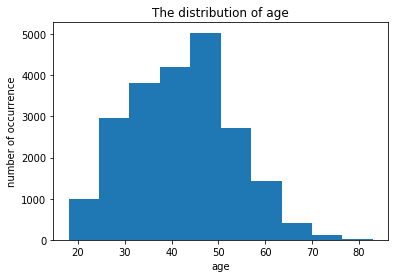

In [11]:
plt.hist(df_new.age)
plt.title("The distribution of age")
plt.xlabel("age")
plt.ylabel("number of occurrence")
plt.show()

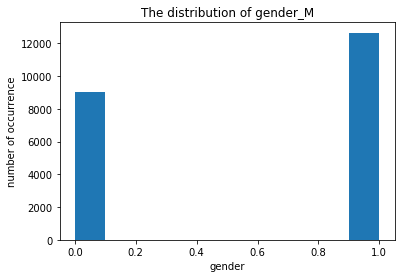

In [12]:
plt.hist(df_new.gender_M)
plt.title("The distribution of gender_M")
plt.xlabel("gender")
plt.ylabel("number of occurrence")
plt.show()

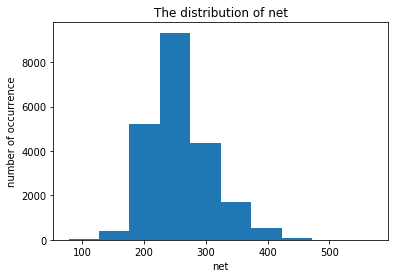

In [13]:
plt.hist(df_new.net)
plt.title("The distribution of net")
plt.xlabel("net")
plt.ylabel("number of occurrence")
plt.show()

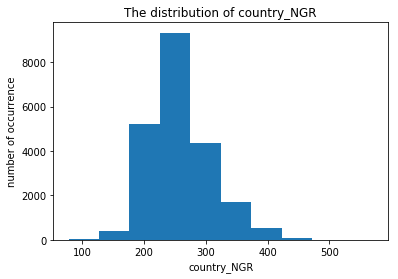

In [14]:
plt.hist(df_new.net)
plt.title("The distribution of country_NGR")
plt.xlabel("country_NGR")
plt.ylabel("number of occurrence")
plt.show()

### Using Yellowbrick to see what the optimal number of K is 

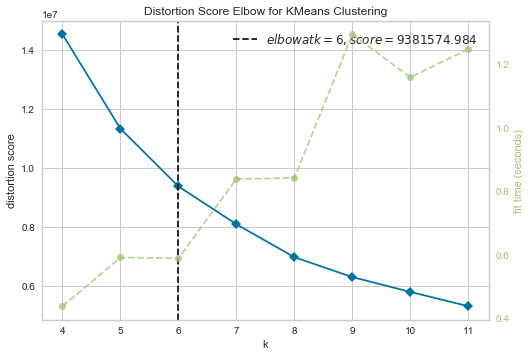

In [15]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Using K Means to understand the patters with a K of 6

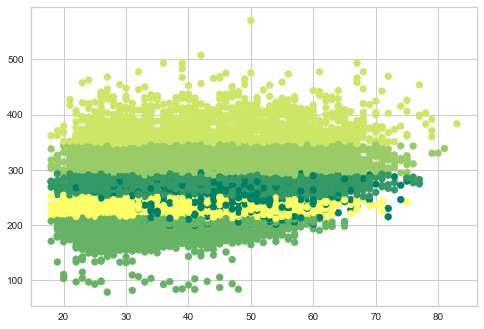

In [16]:

plt.scatter(X['age'], X['net'], c=y_pred, cmap ="summer" )
plt.show()



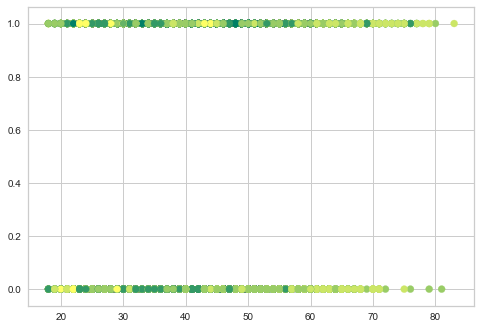

In [17]:
plt.scatter(X['age'], X['gender_M'], c=y_pred, cmap ="summer" )
plt.show()


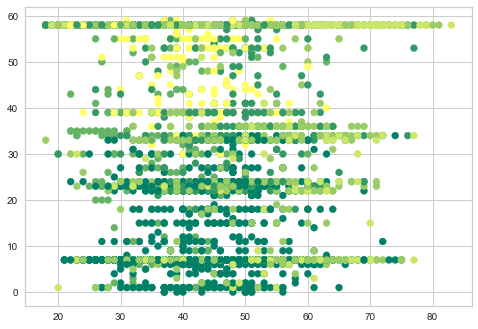

In [18]:
plt.scatter(X['age'], X['country_encoded'], c=y_pred, cmap ="summer")
plt.show()


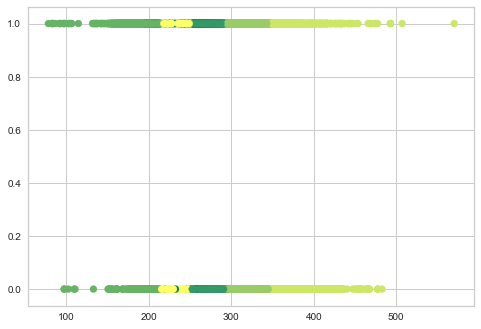

In [19]:
plt.scatter(X['net'], X['gender_M'], c=y_pred, cmap ="summer")
plt.show()


### Here we do start to see some distinct patterns through K Means 

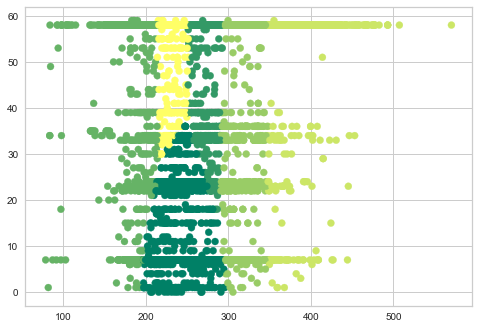

In [20]:

plt.scatter(X['net'], X["country_encoded"], c=y_pred, cmap ="summer")
plt.show()


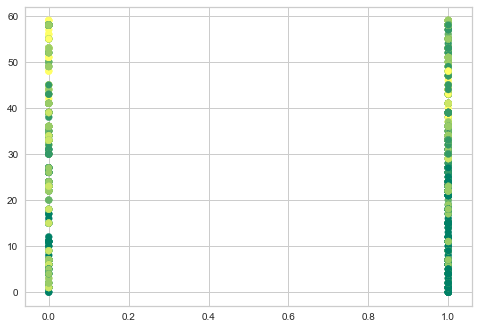

In [21]:
plt.scatter(X['gender_M'], X["country_encoded"], c=y_pred, cmap ="summer")
plt.show()

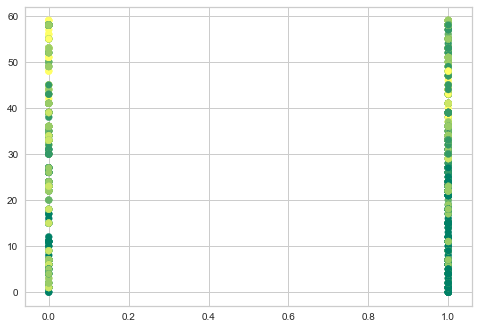

In [22]:
plt.scatter(X['gender_M'], X["country_encoded"], c=y_pred, cmap ="summer")
plt.show()

In [23]:
df_new.head()

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country,gender_F,gender_M,country_encoded
0,4 / 26,"Soejima, Masazumi",Fukuoka City,M,41,83.45,W1,4 / 35,NaN,4 / 26,83.45,JPN,0,1,34
1,14 / 4335,"Gebremariam, Gebregziabher",Tigray,M,27,142.93,2,14 / 21616,NaN,14 / 12621,142.93,ETH,0,1,20
2,6 / 26,"Van Dyk, Ernst F.",Paarl,M,39,84.38,W2,6 / 35,NaN,6 / 26,84.38,RSA,0,1,49
3,2 / 26,"Fearnley, Kurt H.",Hamilton,M,31,81.65,W3,2 / 35,NaN,2 / 26,81.65,AUS,0,1,1
4,3 / 26,"Hokinoue, Kota",Iizuka,M,38,83.43,W4,3 / 35,NaN,3 / 26,83.43,JPN,0,1,34


Ok I am not sure what to do anymore. I am moving on to Mean shift. 

In [24]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

included_cols = [2,4,10]

X = df_new[["age", "gender_M"]]

Y= df_new["net"]


#Divide into training and test sets.
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.9,
    random_state=42)

In [25]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 4


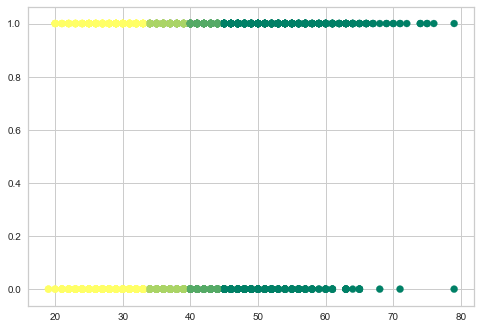

Comparing the assigned categories to the ones in the data:
col_0   0  1  2  3
net               
83.73   1  0  0  0
102.62  0  1  0  0
135.48  0  0  0  1
153.43  0  0  0  1
153.62  0  0  0  1
154.83  0  0  0  1
154.90  0  0  0  1
155.88  0  0  0  1
157.60  0  0  0  1
159.68  0  0  0  1
161.17  0  0  1  0
162.60  0  0  0  1
163.37  0  0  0  1
163.55  0  1  0  0
163.63  0  0  1  0
164.03  0  0  0  1
165.00  0  0  0  1
166.15  0  0  0  1
167.73  0  0  0  1
169.52  0  0  1  0
169.90  1  0  0  0
170.97  0  0  0  1
171.70  0  0  0  1
172.67  0  0  0  1
172.75  0  0  1  0
172.83  0  0  0  1
173.02  0  1  0  0
173.20  0  0  0  1
173.43  0  0  0  1
173.77  0  0  0  1
...    .. .. .. ..
390.07  1  0  0  0
391.48  0  0  0  1
391.77  1  0  0  0
391.93  0  1  0  0
392.85  2  0  0  0
394.60  0  0  0  1
399.53  1  0  0  0
400.32  1  0  0  0
400.45  1  0  0  0
400.67  0  1  0  0
401.68  0  0  1  0
402.67  0  0  0  1
402.83  1  0  0  0
404.47  0  0  0  1
407.03  1  0  0  0
409.35  1  0  0  0
410.97  0 

In [26]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=labels, cmap ="summer")
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(Y_train,labels))

### Spectral clustering

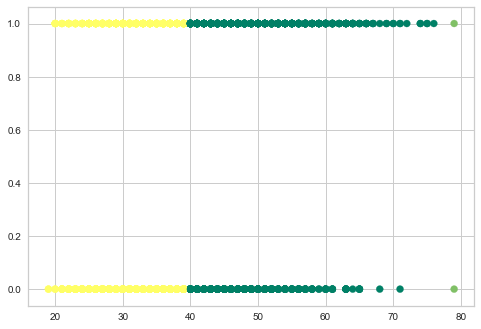

Comparing the assigned categories to the ones in the data:
col_0   0  1  2
net            
83.73   1  0  0
102.62  1  0  0
135.48  0  0  1
153.43  0  0  1
153.62  0  0  1
154.83  0  0  1
154.90  0  0  1
155.88  0  0  1
157.60  0  0  1
159.68  0  0  1
161.17  0  0  1
162.60  0  0  1
163.37  0  0  1
163.55  1  0  0
163.63  0  0  1
164.03  0  0  1
165.00  0  0  1
166.15  0  0  1
167.73  0  0  1
169.52  0  0  1
169.90  1  0  0
170.97  0  0  1
171.70  0  0  1
172.67  0  0  1
172.75  0  0  1
172.83  0  0  1
173.02  1  0  0
173.20  0  0  1
173.43  0  0  1
173.77  0  0  1
...    .. .. ..
390.07  1  0  0
391.48  0  0  1
391.77  1  0  0
391.93  1  0  0
392.85  2  0  0
394.60  0  0  1
399.53  1  0  0
400.32  1  0  0
400.45  1  0  0
400.67  1  0  0
401.68  0  0  1
402.67  0  0  1
402.83  1  0  0
404.47  0  0  1
407.03  1  0  0
409.35  1  0  0
410.97  0  0  1
411.12  1  0  0
411.55  0  0  1
412.62  1  0  0
413.55  1  0  0
416.07  0  0  1
416.08  1  0  0
418.48  0  0  1
419.25  0  0  1
419.33  0  0 

In [27]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=predict, cmap ="summer")
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(Y_train,predict))

### AffinityPropagation

In [28]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 2021
